<a href="https://colab.research.google.com/github/aldixperiaz/bank/blob/main/Bank_Marketing_Dataset_(ALDI%20KRISTANTO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Bank Marketing Data Analysis - ALDI KRISTANTO
Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

## Loading data

In this first step we will load our dataset that has been uploaded on my GitHub for easier process. 

In [54]:
data=pd.read_csv('https://raw.githubusercontent.com/aldixperiaz/bank/main/bank-full.csv',sep=';')
data.shape

(45211, 17)

In [59]:
data.head(10)

,age,job,marital,education,balance,housing,loan,campaign,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,no,1,0,unknown,no
1,44,technician,single,secondary,29,yes,no,1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,1,0,unknown,no
4,33,unknown,single,unknown,1,no,no,1,0,unknown,no
5,35,management,married,tertiary,231,yes,no,1,0,unknown,no
6,28,management,single,tertiary,447,yes,yes,1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,2,yes,no,1,0,unknown,no
8,58,retired,married,primary,121,yes,no,1,0,unknown,no
9,43,technician,single,secondary,593,yes,no,1,0,unknown,no


In [45]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [56]:
data.drop(['duration','contact','month','day','default','pdays',],axis=1,inplace=True)
data.head(5)

,age,job,marital,education,balance,housing,loan,campaign,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,no,1,0,unknown,no
1,44,technician,single,secondary,29,yes,no,1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,1,0,unknown,no
4,33,unknown,single,unknown,1,no,no,1,0,unknown,no


In [61]:
y_valus ={'yes' : 1, 'no' : 0}
data['y'] = data['y'].map(lambda x: y_valus[x])
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [62]:
y = data['y']

In [63]:
data.drop(['y'], axis = 1, inplace = True)

In [83]:
data.head(50)

,age,job,marital,education,balance,housing,loan,campaign,previous,poutcome
0,58,management,married,tertiary,2143,yes,no,1,0,unknown
1,44,technician,single,secondary,29,yes,no,1,0,unknown
2,33,entrepreneur,married,secondary,2,yes,yes,1,0,unknown
3,47,blue-collar,married,unknown,1506,yes,no,1,0,unknown
4,33,unknown,single,unknown,1,no,no,1,0,unknown
5,35,management,married,tertiary,231,yes,no,1,0,unknown
6,28,management,single,tertiary,447,yes,yes,1,0,unknown
7,42,entrepreneur,divorced,tertiary,2,yes,no,1,0,unknown
8,58,retired,married,primary,121,yes,no,1,0,unknown
9,43,technician,single,secondary,593,yes,no,1,0,unknown


In [65]:
#splitting the data 
x_train, le_x_test, y_train, le_y_test = model_selection.train_test_split(data, y, test_size=0.2, random_state=0)
le_x_train, le_x_cv, le_y_train, le_y_cv = model_selection.train_test_split(x_train, y_train, test_size=0.2)

In [66]:
print("the shape of x_train data,{} and shape of x_test data {}:".format(le_x_train.shape,le_x_test.shape))
print("the shape of y_train data,{} and shape of y_test data {}:".format(le_y_train.shape,le_y_test.shape))
print("the shape of x_cv data,{} and shape of y_cv data {}:".format(le_x_cv.shape,le_y_cv.shape))

the shape of x_train data,(28934, 10) and shape of x_test data (9043, 10):
the shape of y_train data,(28934,) and shape of y_test data (9043,):
the shape of x_cv data,(7234, 10) and shape of y_cv data (7234,):


In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [68]:
le.fit(data['job'])

LabelEncoder()

In [69]:
le_x_train.job = le.transform(le_x_train.job)
le_x_test.job = le.transform(le_x_test.job)
le_x_cv.job = le.transform(le_x_cv.job)

In [70]:
le = LabelEncoder()
le.fit(data['marital'])
le_x_train.marital = le.transform(le_x_train.marital)
le_x_test.marital = le.transform(le_x_test.marital)
le_x_cv.marital = le.transform(le_x_cv.marital)

In [71]:
le = LabelEncoder()
le.fit(data['education'])
le_x_train.education = le.transform(le_x_train.education)
le_x_test.education = le.transform(le_x_test.education)
le_x_cv.education = le.transform(le_x_cv.education)

In [72]:
le = LabelEncoder()
le.fit(data['housing'])
le_x_train.housing = le.transform(le_x_train.housing)
le_x_test.housing = le.transform(le_x_test.housing)
le_x_cv.housing = le.transform(le_x_cv.housing)

In [73]:
import warnings
warnings.filterwarnings("ignore")

In [74]:
le = LabelEncoder()
le.fit(data['loan'])
le_x_train.loan = le.transform(le_x_train.loan)
le_x_test.loan = le.transform(le_x_test.loan)
le_x_cv.loan = le.transform(le_x_cv.loan)

In [75]:
le = LabelEncoder()
le.fit(data['poutcome'])
le_x_train.poutcome = le.transform(le_x_train.poutcome)
le_x_test.poutcome = le.transform(le_x_test.poutcome)
le_x_cv.poutcome = le.transform(le_x_cv.poutcome)

In [76]:
le_x_train.head(2)

,age,job,marital,education,balance,housing,loan,campaign,previous,poutcome
2624,53,0,0,1,887,1,0,2,0,3
8388,41,1,1,1,-256,1,0,2,0,3


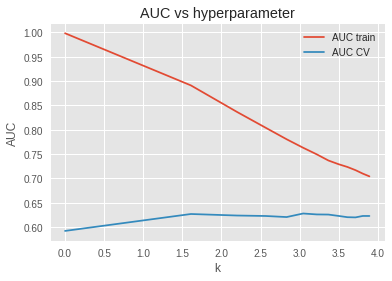

optimal alpha for which auc is maximum :  21


In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math

k = list(range(1,50,4))

train_auc = []
cv_auc = []

for i in k:
    clf = KNeighborsClassifier(n_neighbors = i,algorithm='brute')
    clf.fit(le_x_train,le_y_train)
    prob_cv = clf.predict_proba(le_x_cv)[:,1]
    cv_auc.append(roc_auc_score(le_y_cv,prob_cv))
    prob_train = clf.predict_proba(le_x_train)[:,1]
    train_auc.append(roc_auc_score(le_y_train,prob_train))
optimal_k = k[cv_auc.index(max(cv_auc))]
k = [math.log(x) for x in k]

#plot auc vs alpha
x = plt.subplot( )
x.plot(k, train_auc, label='AUC train')
x.plot(k, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_k)

In [78]:
from sklearn.metrics import confusion_matrix

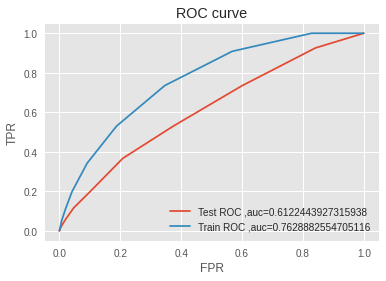

AUC on Test data is 0.6122443927315938
AUC on Train data is 0.7628882554705116
---------------------------


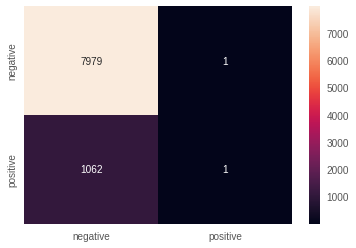

In [79]:
#Testing AUC on Test data
clf = KNeighborsClassifier(n_neighbors = optimal_k,algorithm='brute')
clf.fit(le_x_train,le_y_train)
pred_test = clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(le_y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

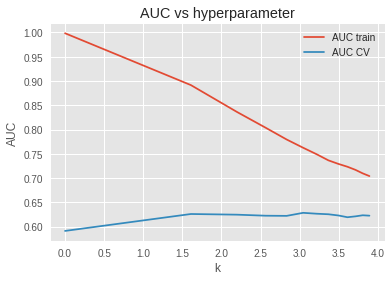

optimal alpha for which auc is maximum :  21


In [81]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math

k = list(range(1,50,4))

train_auc = []
cv_auc = []

for i in k:
    clf = KNeighborsClassifier(n_neighbors = i,algorithm='kd_tree')
    clf.fit(le_x_train,le_y_train)
    prob_cv = clf.predict_proba(le_x_cv)[:,1]
    cv_auc.append(roc_auc_score(le_y_cv,prob_cv))
    prob_train = clf.predict_proba(le_x_train)[:,1]
    train_auc.append(roc_auc_score(le_y_train,prob_train))
optimal_k = k[cv_auc.index(max(cv_auc))]
k = [math.log(x) for x in k]

#plot auc vs alpha
x = plt.subplot( )
x.plot(k, train_auc, label='AUC train')
x.plot(k, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_k)

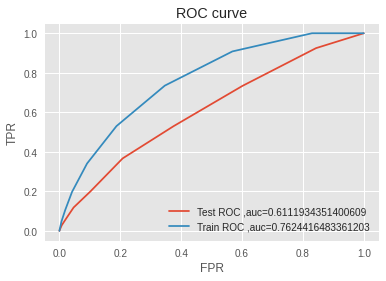

AUC on Test data is 0.6111934351400609
AUC on Train data is 0.7624416483361203
---------------------------


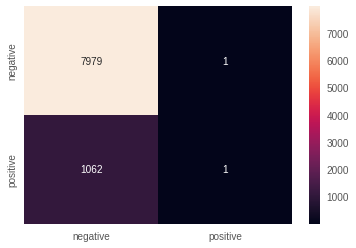

In [82]:
#Testing AUC on Test data
clf = KNeighborsClassifier(n_neighbors = optimal_k,algorithm='kd_tree')
clf.fit(le_x_train,le_y_train)
pred_test = clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(le_y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

# Hasil pengolahan

Interpretasi:
a. Berdasarkan kurva error dan accuracy diatas apakah training model memberikan indikasi underfitting atau overfitting dengan dataset yang dipergunakan sebagai input?

jika dilihat dari data terjadi overfitting karena gap besar antar ROC

b. Apakah dengan 50 epoch sudah memberikan indikasi konvergensi kurva error training dan validasi dari proses training?

masih belum cukup dengan 50 epoch karena kurva training masih belum landai

c. Bagaimana penilaian Anda terhadap kinerja model klasifikasi dengan data input yang dipergunakan berdasarkan nilai rata-rata training accuracy maupun validation accuracy?

kinerja model masih rendah accuracy nya dan validation belum bisa dibuktikan karena model belum solid